## Importación de las librerías

In [1]:
import utils
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


## Conjuntos de entrenamiento y test y CV controller

In [12]:
X_train, X_test, y_train, y_test = utils.get_train_test_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7776, 12) (1022, 12) (7776,) (1022,)


In [13]:
cv = utils.get_stratified_shuffle_cv()
print(cv)

StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8)


## Carga del mejor árbol de clasificación

Este será el árbol que se empleará para realizar el **xgboost**

In [14]:
decision_tree_model = pickle.load(open('/kaggle/input/decision-tree-model/decision_tree_model.sav', 'rb'))
print(decision_tree_model.criterion)
decision_tree_model

gini


DecisionTreeClassifier(max_depth=10, min_samples_leaf=45, min_samples_split=200,
                       random_state=99)

## Búsqueda del parámetro subsample del xgboosting

Establecemos el **colsample_bytree** en 0.3 que es como max_features='sqrt'

In [15]:
param_grid = {
    'n_estimators': list(range(50,501,50)),
    'subsample': list(np.arange(0.1,1.01,0.1))
}

grid_search_cv = GridSearchCV(
    XGBClassifier(max_depth=decision_tree_model.max_depth, colsample_bytree=0.3, random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=0, n_jobs=-1
)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_sta

Escogemos como subsample 0.4, ya que apartir de alli no hay mejora significativa

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

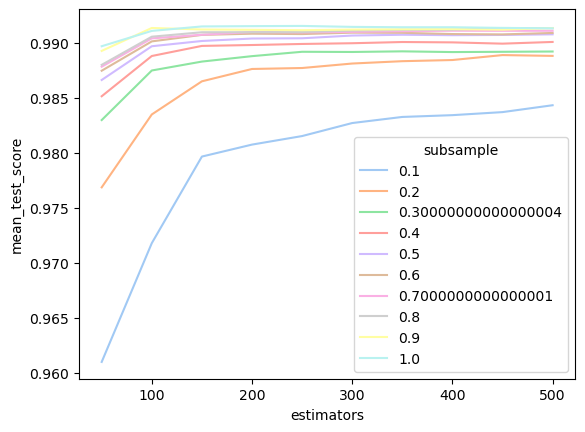

In [16]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
subsample_list = list(grid_search_cv.cv_results_['param_subsample'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
xgboosting_df = pd.DataFrame(list(zip(estimators_list, subsample_list, mean_test_score_list)), columns=['estimators', 'subsample', 'mean_test_score'])
sns.lineplot(data=xgboosting_df, x="estimators", y="mean_test_score", hue="subsample", legend="full", palette="pastel")

## Búsqueda del parámetro eta (learning_rate) del xgboosting

In [17]:
param_grid = {
    'n_estimators': list(range(50,1001,100)),
    'eta': [0.1, 0.05, 0.03, 0.01, 0.001]
}

grid_search_cv = GridSearchCV(
    XGBClassifier(max_depth=decision_tree_model.max_depth, colsample_bytree=0.3, subsample=0.4, random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=0, n_jobs=-1
)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_...
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tr

Seleccionamos el valor del **learning rate** como 0.03

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

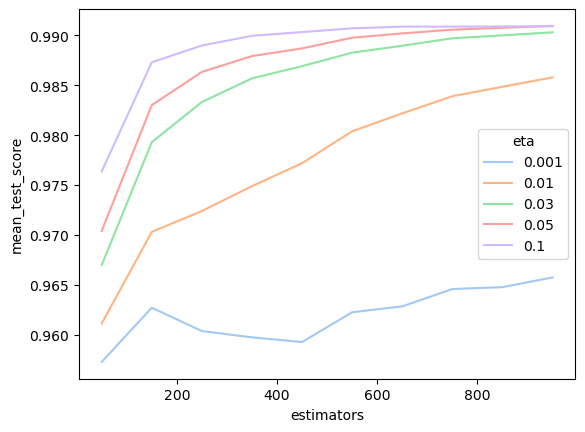

In [18]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
eta_list = list(grid_search_cv.cv_results_['param_eta'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
xgboosting_df = pd.DataFrame(list(zip(estimators_list, eta_list, mean_test_score_list)), columns=['estimators', 'eta', 'mean_test_score'])
sns.lineplot(data=xgboosting_df, x="estimators", y="mean_test_score", hue="eta", legend="full", palette="pastel")

## Búsqueda del parámetro lambda (L2 Regularization) del xgboosting

In [19]:
param_grid = {
    'n_estimators': list(range(50,1001,100)),
    'lambda': [0.001, 0.01, 0.1, 0.5, 1]
}

grid_search_cv = GridSearchCV(
    XGBClassifier(max_depth=decision_tree_model.max_depth, colsample_bytree=0.3, subsample=0.4, eta=0.03, random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=0, n_jobs=-1
)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.03,
                                     eval_metric=None, gamma=None, gpu_id=None,
                                     grow_policy=None, im...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_j

Seleccionamos el valor del **lambda** como **0.5**

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

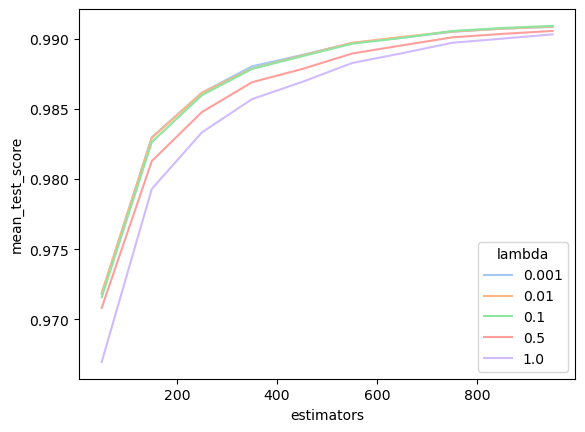

In [20]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
lambda_list = list(grid_search_cv.cv_results_['param_lambda'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
xgboosting_df = pd.DataFrame(list(zip(estimators_list, lambda_list, mean_test_score_list)), columns=['estimators', 'lambda', 'mean_test_score'])
sns.lineplot(data=xgboosting_df, x="estimators", y="mean_test_score", hue="lambda", legend="full", palette="pastel")

## Búsqueda del parámetro n_estimators del xgboosting

In [21]:
param_grid = {
    'n_estimators': list(range(10,1001,20)),
}

grid_search_cv = GridSearchCV(
    XGBClassifier(max_depth=decision_tree_model.max_depth, colsample_bytree=0.3,
                  reg_lambda=0.5, subsample=0.4, eta=0.03, random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=0, n_jobs=-1
)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.03,
                                     eval_metric=None, gamma=None, gpu_id=None,
                                     grow_policy=None, im...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_st

Decidimos que el número de árboles a usar será: **20** (por prueba y error) ya que la mejora desde allí es insignificativa, además es un modelo menos sobrejustado

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

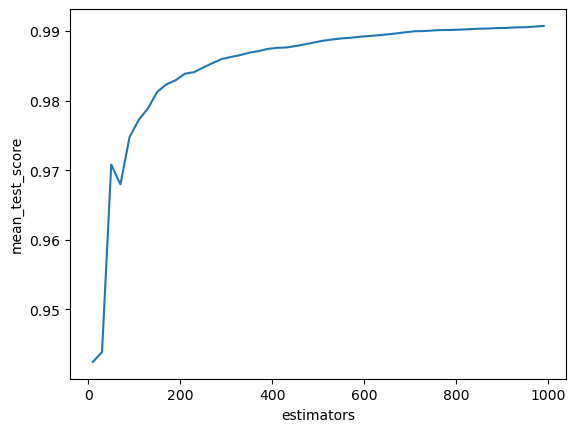

In [23]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
xgboosting_df = pd.DataFrame(list(zip(estimators_list, mean_test_score_list)), columns=['estimators', 'mean_test_score'])
xgboosting_df['mean_test_score_shift'] = xgboosting_df['mean_test_score'].shift().fillna(0)
xgboosting_df['diff'] = (xgboosting_df['mean_test_score'] - xgboosting_df['mean_test_score_shift'])
sns.lineplot(data=xgboosting_df, x="estimators", y="mean_test_score", legend="full")

In [24]:
xgboosting_df

,estimators,mean_test_score,mean_test_score_shift,diff
0,10,0.942460,0.000000,0.942460
1,30,0.943878,0.942460,0.001419
2,50,0.970818,0.943878,0.026940
3,70,0.967976,0.970818,-0.002842
4,90,0.974804,0.967976,0.006829
5,110,0.977260,0.974804,0.002456
6,130,0.978905,0.977260,0.001645
7,150,0.981278,0.978905,0.002373
8,170,0.982349,0.981278,0.001072
9,190,0.982940,0.982349,0.000591


**Modelo de xgboosting**

Confusion matrix, without normalization
[[723 249]
 [ 17  33]]


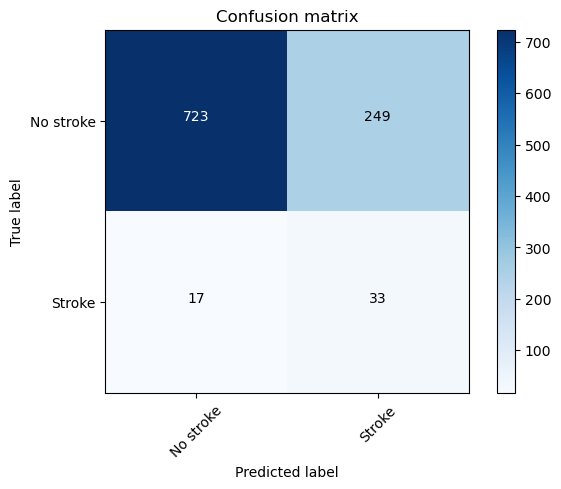

In [59]:
xgboosting_model = XGBClassifier(
    max_depth=decision_tree_model.max_depth, colsample_bytree=0.3, n_estimators=20,
    reg_lambda=0.5, subsample=0.4, eta=0.03, random_state=99
)

xgboosting_model.fit(X_train, y_train)
y_pred = xgboosting_model.predict(X_test)

cm = utils.get_confusion_matrix(y_test, y_pred)
utils.plot_confusion_matrix(cm=cm, classes=['No stroke', 'Stroke'])

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.12      0.66      0.20        50

    accuracy                           0.74      1022
   macro avg       0.55      0.70      0.52      1022
weighted avg       0.93      0.74      0.81      1022



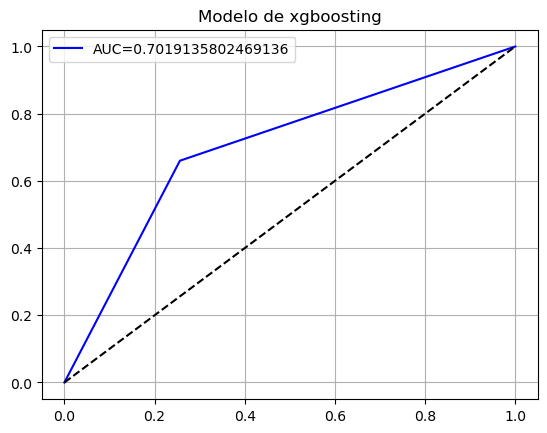

In [60]:
utils.print_metrics(y_test, y_pred, "Modelo de xgboosting")

## Importancia de las variables

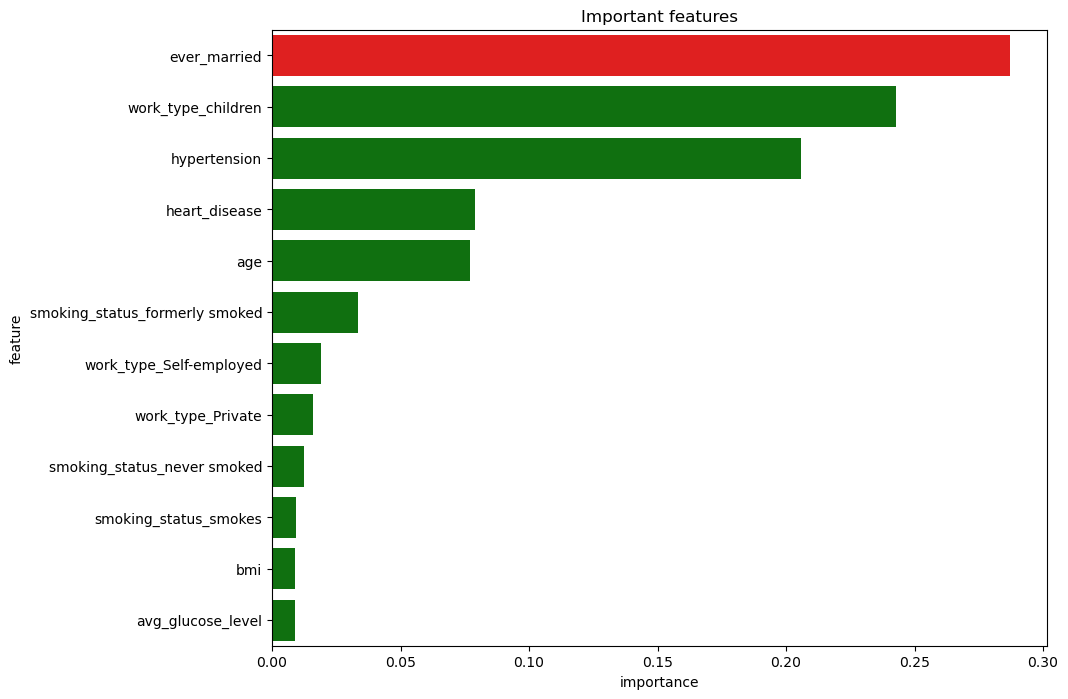

In [61]:
utils.plot_tree_feature_importance(xgboosting_model.feature_names_in_, xgboosting_model.feature_importances_)

**Guardamos el modelo para la comparativa final**

In [62]:
pickle.dump(xgboosting_model, open("xgboosting_model.sav", 'wb'))